## Datos

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [16]:
# Cargar el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Practico Coink/Data Proyec Coink/info_satisfaccion_trabajo.csv')

In [17]:
# Mostrar datos
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,Yes,3,1,8,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,No,4,4,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,6,Yes,3,2,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,1,Yes,3,3,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,9,No,3,4,6,3,2,2,2,2


In [18]:
# Lista de columnas para verificar valores nulos
columns_to_check = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
                    'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'NumCompaniesWorked',
                    'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
                    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Verificar si hay valores nulos en las columnas especificadas
null_check = df[columns_to_check].isnull().any()

# Mostrar las columnas con valores nulos y su cantidad
print("Columnas con valores nulos:")
print(null_check[null_check].index)
print("\nCantidad de valores nulos por columna:")
print(df[columns_to_check].isnull().sum())


Columnas con valores nulos:
Index([], dtype='object')

Cantidad de valores nulos por columna:
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [25]:
# Informacion de DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   Department                1470 non-null   int64 
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   int64 
 7   EmployeeNumber            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   int64 
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

## modificar tipo de datos y columnas

In [20]:
# Eliminar la columna 'YearsSinceLastPromotion'
df = df.drop('YearsSinceLastPromotion', axis=1)

In [21]:
#Informacion de JobSatisfaction
df["JobSatisfaction"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: JobSatisfaction
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB


In [22]:
# Cantidad de datos por grupo
df["JobSatisfaction"].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [23]:
# Convertir 'Yes' a 1 y 'No' a 0 en la columna 'OverTime'
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Convertir 'BusinessTravel' a tipo numérico
df['BusinessTravel'] = df['BusinessTravel'].map({
    'Travel_Rarely': 1,
    'Travel_Frequently': 2,
    'Non-Travel': 0
})



# Convertir 'Department' a tipo numérico
df['Department'] = df['Department'].map({
    'Sales': 1,
    'Research & Development': 2,
    'Human Resources': 0
})

# Convertir 'Attrition' a tipo numérico
df['Attrition'] = df['Attrition'].map({
    'Yes': 1,
    'No': 0
})

# Aplicar mapeo a la columna
education_mapping = {
    'Life Sciences': 0,
    'Medical': 1,
    'Marketing': 2,
    'Technical Degree': 3,
    'Other': 4,
    'Human Resources': 5
}

# Aplicar el mapeo a la columna 'EducationField'
df['EducationField'] = df['EducationField'].map(education_mapping)


marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}

# Aplicar el mapeo a la columna 'MaritalStatus'
df['MaritalStatus'] = df['MaritalStatus'].map(marital_mapping)


# Convertir 'EmployeeNumber' a tipo objeto
df['EmployeeNumber'] = df['EmployeeNumber'].astype(str)

# Convertir a tipo num
gender_mapping = {
    'Male': 0,
    'Female': 1
}

# Aplicar el mapeo a la columna 'Gender'
df['Gender'] = df['Gender'].map(gender_mapping)

# Aplicar mapeo a la columna
jobrole_mapping = {
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
}

# Aplicar el mapeo a la columna 'JobRole'
df['JobRole'] = df['JobRole'].map(jobrole_mapping)



# Modelo

## Arbol de decision

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


### columnas a utilizar

In [26]:
df= df[["Education", "EnvironmentSatisfaction","JobInvolvement", "RelationshipSatisfaction","WorkLifeBalance", "PerformanceRating", "JobSatisfaction" ]]


## Modelo

Accuracy Score: 63.06%


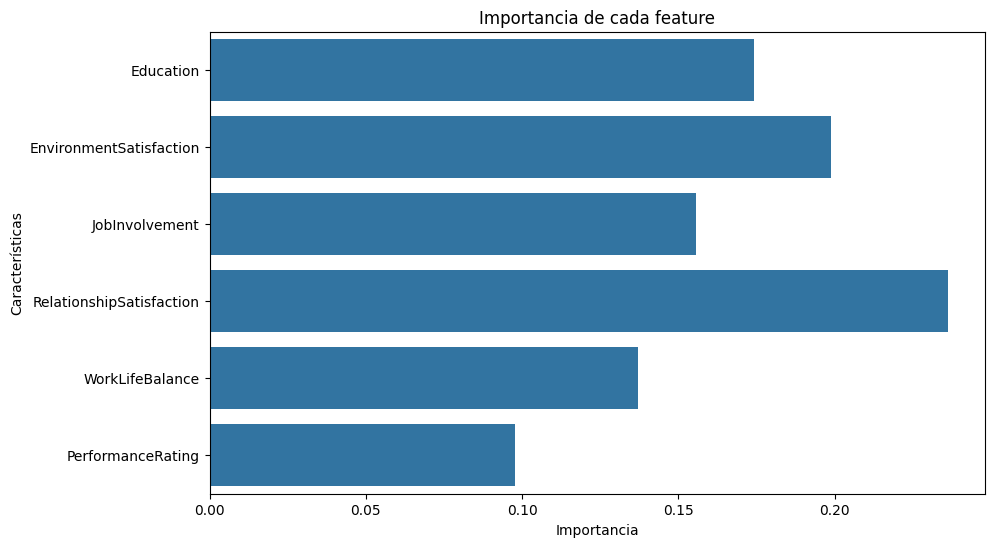

In [49]:

# Crear la matriz de características X y la variable objetivo y
X = df.drop(labels=["JobSatisfaction"], axis=1)
y = df['JobSatisfaction']

# Instanciar un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=30, random_state=1000)

# Entrenar el modelo
clf.fit(X, y)

# Hacer predicciones
y_pred = clf.predict(X)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

# Visualizar la importancia de cada característica en el modelo
plt.figure(figsize=(10, 6))
importances = clf.feature_importances_
columns = X.columns
sns.barplot(x=importances, y=columns)
plt.title('Importancia de cada feature')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()
